In [ ]:
%pip install pydicom

### DICOM sample visualization

Automatically created module for IPython interactive environment

Filename.........: dataset/Image-11.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.4

Patient's name...: 00009, 
Patient id.......: 00009
Modality.........: MR
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.468800008296967, 0.468800008296967]
Slice location...: 30.56045723


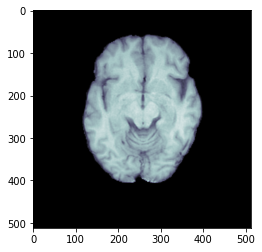

In [8]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

print(__doc__)

# filename = get_testdata_files('CT_small.dcm')[0]
filename = "dataset/Image-11.dcm"
dataset = pydicom.dcmread(filename)

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

pat_name = dataset.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print("Patient's name...:", display_name)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
# print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

[ 1 ] MRI-Based Deep-Learning Method for Determining Glioma MGMT Promoter Methylation Status 
  * uses normalization with ANTs
  
[ 2 ] The RSNA-ASNR-MICCAI BraTS 2021 Benchmark on Brain Tumor Segmentation and Radiogenomic Classification

[ 3 ] Automatic Prediction of MGMT Status in Glioblastoma via Deep Learning-Based MR Image Analysis
   * uses intensity normalization
   * data augmentation (image rotations)
   * performance of segmentation task evaluated with DICE Score

### Intensity normalization for MR images:
* https://github.com/ANTsX/ANTs - **Advanced Normalization Tools**
* https://github.com/jcreinhold/intensity-normalization - **Intensity Normalization Package** (see *Recommendation on where to start*)

### Motivation for Intensity Normalization:

Intensity normalization is an important pre-processing step in many image processing applications regarding MR images since MR images have an inconsistent intensity scale across (and within) sites and scanners due to, e.g.,:

the use of different equipment,
different pulse sequences and scan parameters,
and a different environment in which the machine is located.
Importantly, the inconsistency in intensities isn't a feature of the data (unless you want to classify the scanner/site from which an image came)—it's an artifact of the acquisition process. The inconsistency causes a problem with machine learning-based image processing methods, which usually assume the data was gathered iid from some distribution.